<a href="https://colab.research.google.com/github/aliasharf123/flower-classification/blob/main/Copy_of_Copy_of_Copy_of_flowers2_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks Project 2 - Flower Classification using CNN**#

Team Members:
- Ali Ashraf Ali  2103106

- Hagar Tarek Shaheen 20221310699




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!gdown https://drive.google.com/file/d/1JRd6zO-6uktGo0DFtXVlk2HuxoIrJKl2/view?usp=share_link

In [ ]:
!unzip "/content/gdrive/MyDrive/Data/NN_Project_2_Data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/5/5844838862054ccc38aeb1.png  
  inflating: Data/train/5/ffd51f3a524952b4f4bb30.png  
  inflating: Data/train/5/70f422e3e773c8c9243c41.png  
  inflating: Data/train/5/c583c06044e2f3ec2292e8.png  
  inflating: Data/train/5/d39062540a1ebc0e58450c.png  
  inflating: Data/train/5/5aad4418fd3328b0503b3b.png  
  inflating: Data/train/5/efc7fff969281e3085a135.png  
  inflating: Data/train/5/cb37feb3a0b99b089299f0.png  
  inflating: Data/train/5/4241bb14f3ea769209f1ba.png  
  inflating: Data/train/5/0e95c16188d7599960a9f8.png  
  inflating: Data/train/5/9b105b80f174367f641895.png  
  inflating: Data/train/5/8f4f9b066910f4565d01d4.png  
  inflating: Data/train/5/4eb8253947d28833b97aa4.png  
  inflating: Data/train/5/f778453646c3218d7d22ea.png  
  inflating: Data/train/5/160104c5ceef7bff1c078c.png  
  inflating: Data/train/5/b688e0f72db0397ff7d1c2.png  
  inflating: Data/train/5/a26a5052c6f034dfcc35b9.png  
   creating: D

## load Data

In [ ]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 26.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from PIL import Image
import ast
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Input, Average
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import tensorflow_addons as tfa
from sklearn.metrics import ConfusionMatrixDisplay



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def test_model1(model):
  """
  Tests the given model using the test dataset.

  Returns:
  --------
  Two arrays, the output of the model and the true labels.
  """
  output, labels = [], []
  # Iterate over all test data
  while len(labels) != 3712:
    # Generate the next batch
    image_batch, label_batch = test_data.next()
    # Pass it to our model and add the result to our lists.
    # Use `verbose=0` to compute the result silently.
    batch_output = model.predict(image_batch, verbose=0)
    output.extend(batch_output)
    labels.extend(label_batch)
  # Convert the lists to numpy array to have access to methods
  # such as `shape`, `size`, etc. They are also shown in a nicer
  # way in the Jupyter console. Also, the labels are floats for
  # some reason, so we convert them to integers.
  return np.array(output), np.array(labels).astype(int)

In [ ]:
def LoadClasses(file_Path):

  # Read a file
  with open(file_Path, 'r') as file:
    file_content = file.read()

  # Extract the array from the file content
  array_string = file_content.replace('CLASSES = ', '')
  Classes = np.array(eval(array_string))
  return Classes

In [ ]:
Classes_path = './Data/Classes.txt'
Classes_label = LoadClasses(Classes_path)

In [ ]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    validation_split=0.1 , # Split the dataset into 90% training and 10% validation
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30, # randomly rotate by up to 30 degrees
    width_shift_range=0.2, # randomly shift the image horizontally by up to 20%
    height_shift_range=0.2, # randomly shift the image vertically by up to 20%
)

# Define the image data flow from the directory
train_directory = './Data/train'
test_directory = './Data/test'

image_size = (256, 256)  # Desired image size
batch_size = 32  # Number of images to process at once

# Load and preprocess the images
train_data = image_generator.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    seed = 42 ,
    class_mode='sparse',  # Use categorical labels for multi-class classification
    subset='training'  # Specify the subset as training data
)

validation_data = image_generator.flow_from_directory(
    train_directory,
    target_size=image_size,
    seed = 42 ,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  # Specify the subset as validation data
)
test_data = image_generator.flow_from_directory(
    test_directory,
    target_size=image_size,
    seed = 42 ,
    batch_size=batch_size,
    class_mode='sparse',
)

Found 11524 images belonging to 104 classes.
Found 1229 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


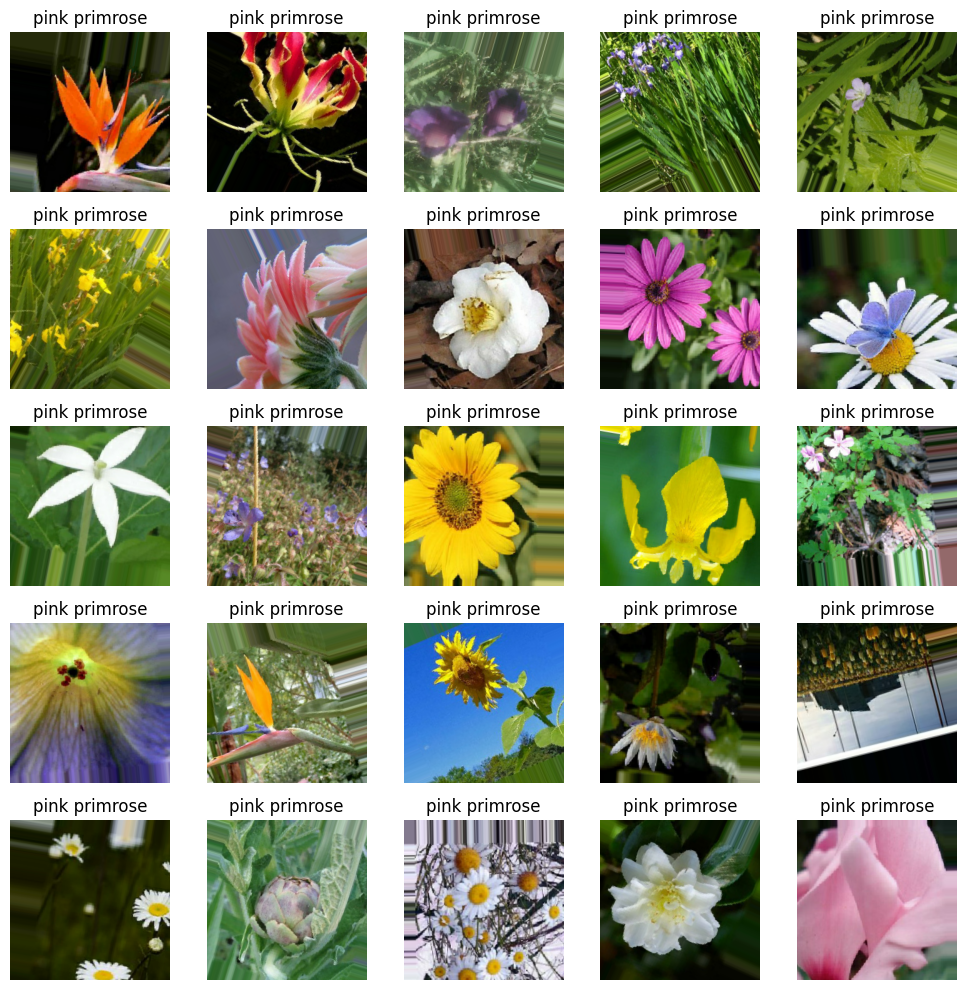

In [ ]:
images, labels = train_data.next()

# Define the class labels
class_labels = train_data.class_indices

# Create a grid of images
num_images = images.shape[0]
rows = int(num_images**0.5)
cols = int(num_images**0.5)

# Plot the images
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.axis('off')
    label = list(class_labels.keys())[list(class_labels.values()).index(labels[i].argmax())]
    ax.set_title(Classes_label[int(label)])

plt.tight_layout()
plt.show()

# Simple CNN Model

## Build model

In [ ]:
# Build the CNN model
model = tf.keras.Sequential([
    # Define your CNN layers here
    # Example:
    # Conv 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Conv 2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Conv 3
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Conv 4
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(104, activation='softmax')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3, epsilon=0.1), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      3

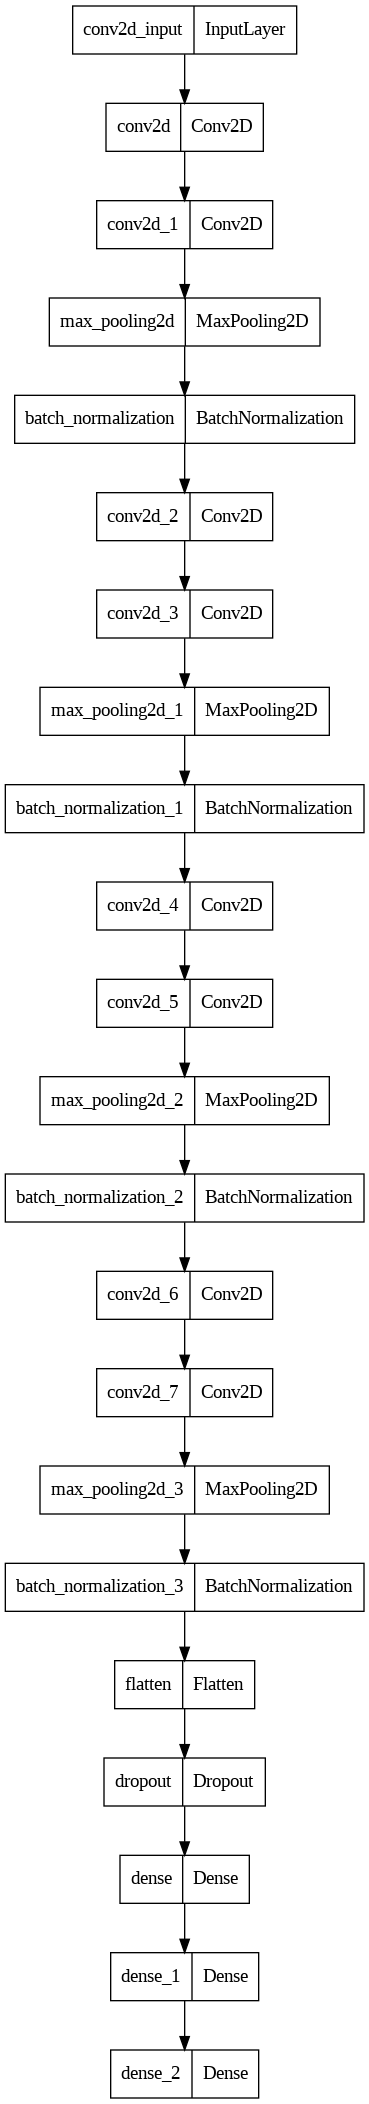

In [ ]:
plot_model(model)

## Train

In [ ]:
model.load_weights('/content/gdrive/MyDrive/Checkpoint/model/checkpoint3/sample')


In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Save model after each epoch
path_checkpoint = "/content/gdrive/MyDrive/Checkpoint/model/checkpoint3/sample"
directory_checkpoint = os.path.dirname(path_checkpoint)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model
epochs = 10  # Number of training epochs
history = model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[callback])


## Plot

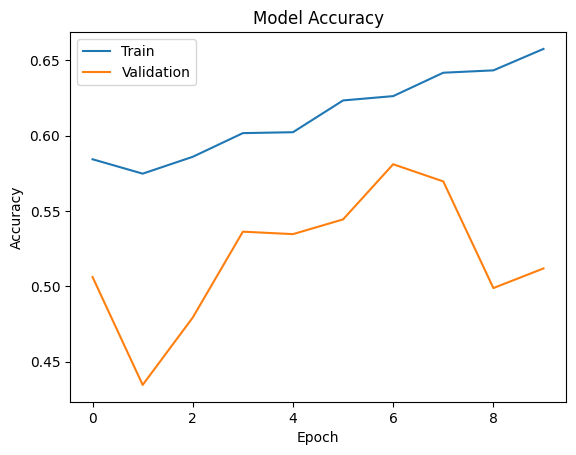

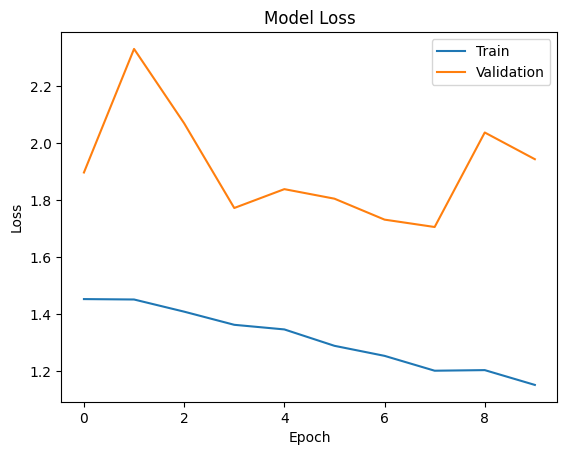

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Test

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

116/116 [==============================] - 663s 6s/step - loss: 4.6429 - accuracy: 0.0057
Test Loss: 4.642917156219482
Test Accuracy: 0.005657327361404896


In [ ]:
# Make predictions on the test dataset using the trained model
output, labels = test_model1(model)
predicted_labels = np.argmax(output, axis=1)

## confusion_matrix

[[ 0  0 35 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  8 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


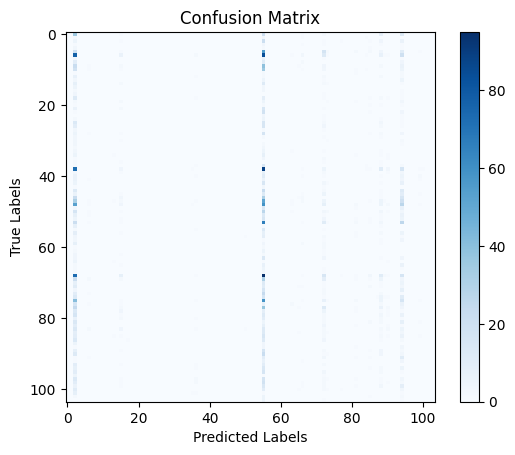

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(labels, predicted_labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Most Confusing Classes

In [ ]:
misclassification_count = np.sum(cm, axis=1) - np.diag(cm)

# Find the indices of the most confusing classes (classes with the highest misclassification counts)
most_confusing_classes = np.argsort(misclassification_count)[::-1]

# Print the 5 most confusing classes and their misclassification counts
for i in range(5):
    class_idx = most_confusing_classes[i]
    print('Class:',Classes_label[class_idx])
    print('Misclassification count:', misclassification_count[class_idx])
    print('---')

Class: windflower
Misclassification count: 228
---
Class: moon orchid
Misclassification count: 216
---
Class: siam tulip
Misclassification count: 205
---
Class: daisy
Misclassification count: 164
---
Class: morning glory
Misclassification count: 134
---


## F-score

In [ ]:
# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print precision, recall, and F1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.556930510937822
Recall: 0.5040409482758621
F1 Score: 0.5013954375635282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### F score for each

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(labels, predicted_labels ,target_names=Classes_label)

# Print the classification report
print(report)

                           precision    recall  f1-score   support

            pink primrose       0.86      0.56      0.68        79
hard-leaved pocket orchid       1.00      0.57      0.73         7
         canterbury bells       0.24      0.30      0.26        40
                sweet pea       0.00      0.00      0.00         9
            wild geranium       1.00      0.43      0.60         7
               tiger lily       0.66      0.25      0.37       114
              moon orchid       0.60      0.69      0.64       216
         bird of paradise       0.69      0.69      0.69        13
                monkshood       0.72      0.67      0.69        27
            globe thistle       0.71      0.57      0.63        77
               snapdragon       0.65      0.50      0.56        66
              colt's foot       0.00      0.00      0.00         6
              king protea       0.74      0.88      0.80        16
            spear thistle       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### the class with best f score

In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for each class
f1_scores = f1_score(labels, predicted_labels, average=None)

# Find the class with the best F1 score
best_class = np.argmax(f1_scores)

# Print the class and its corresponding F1 score
print('Best class:', Classes_label[best_class])
print('F1 score:', f1_scores[best_class])
# Print the classification report

Best class: japanese anemone
F1 score: 1.0


# VGG19 - PreTrained

## Build model

In [ ]:
vgg19 = Sequential([
    VGG19(include_top=False, weights='imagenet', pooling='max', input_shape=(256, 256, 3)),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(104, activation='softmax'),
])

vgg19.compile(optimizer=Adam(learning_rate=1e-5),
              loss=SparseCategoricalCrossentropy(),
              metrics='accuracy')

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_3 (Dense)             (None, 4096)              2101248   
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_5 (Dense)             (None, 104)               426088    
                                                                 
Total params: 39,333,032
Trainable params: 39,333,032
Non-trainable params: 0
_________________________________________________________________


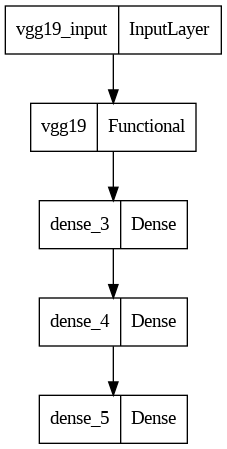

In [ ]:
plot_model(vgg19)

## load weights

In [ ]:
vgg19.load_weights('/content/gdrive/MyDrive/Checkpoint/VGG19/checkpoint/sample')

## Train

In [ ]:
# Compile the model
# Save model after each epoch
path_checkpoint_vgg19 = "/content/gdrive/MyDrive/Checkpoint/VGG19/checkpoint/sample"
directory_checkpoint = os.path.dirname(path_checkpoint_vgg19)
vgg19_callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint_vgg19,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model
epochs = 10  # Number of training epochs
vgg19_history = vgg19.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[vgg19_callback])

Epoch 1/10
361/361 [==============================] - ETA: 0s - loss: 2.9493 - accuracy: 0.3285
Epoch 1: saving model to /content/gdrive/MyDrive/Checkpoint/VGG19/checkpoint/sample
361/361 [==============================] - 367s 925ms/step - loss: 2.9493 - accuracy: 0.3285 - val_loss: 1.6482 - val_accuracy: 0.5972
Epoch 2/10
361/361 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.6434
Epoch 2: saving model to /content/gdrive/MyDrive/Checkpoint/VGG19/checkpoint/sample
361/361 [==============================] - 355s 982ms/step - loss: 1.3873 - accuracy: 0.6434 - val_loss: 1.1510 - val_accuracy: 0.6916
Epoch 3/10
361/361 [==============================] - ETA: 0s - loss: 0.9680 - accuracy: 0.7381
Epoch 3: saving model to /content/gdrive/MyDrive/Checkpoint/VGG19/checkpoint/sample
361/361 [==============================] - 340s 941ms/step - loss: 0.9680 - accuracy: 0.7381 - val_loss: 1.0102 - val_accuracy: 0.7290
Epoch 4/10
361/361 [==============================] - E

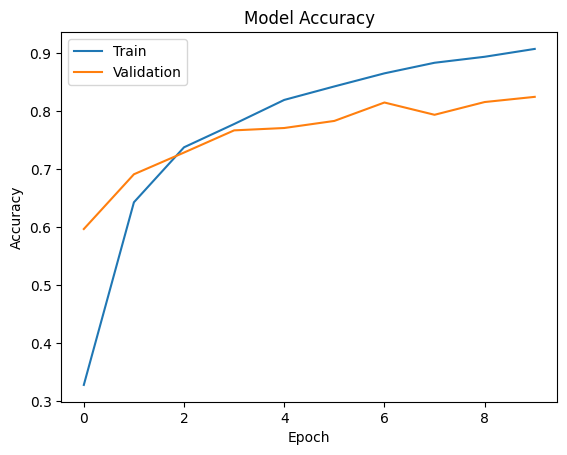

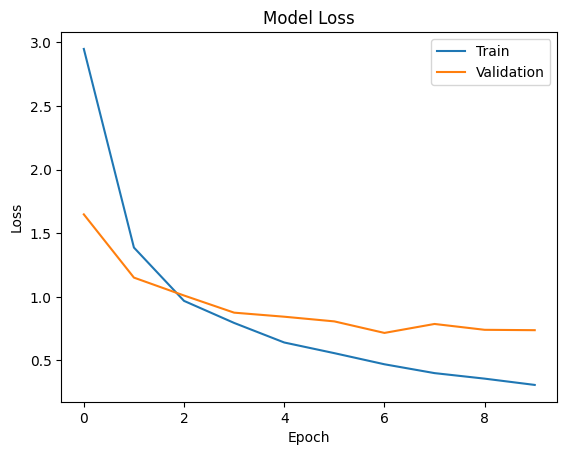

In [ ]:
plt.plot(vgg19_history.history['accuracy'])
plt.plot(vgg19_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(vgg19_history.history['loss'])
plt.plot(vgg19_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Test

In [ ]:
test_loss, test_accuracy = vgg19.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

116/116 [==============================] - 4123s 36s/step - loss: 0.8122 - accuracy: 0.7982
Test Loss: 0.8122240900993347
Test Accuracy: 0.798222005367279


In [ ]:
# Make predictions on the test dataset using the trained model
output, labels = test_model1(vgg19)
predicted_labels = np.argmax(output, axis=1)

## Confusion matrix

[[59  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  7]]


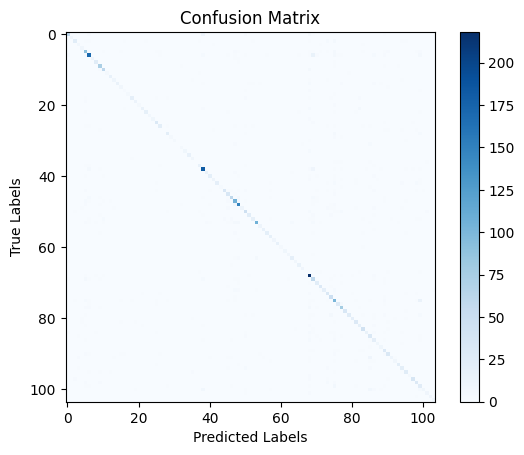

In [ ]:
cm = confusion_matrix(labels, predicted_labels)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Most Confusing classes

In [ ]:
misclassification_count = np.sum(cm, axis=1) - np.diag(cm)

# Find the indices of the most confusing classes (classes with the highest misclassification counts)
most_confusing_classes = np.argsort(misclassification_count)[::-1]

# Print the 5 most confusing classes and their misclassification counts
for i in range(5):
    class_idx = most_confusing_classes[i]
    print('Class:',Classes_label[class_idx])
    print('Misclassification count:', misclassification_count[class_idx])
    print('---')

## F-score

In [ ]:
# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print precision, recall, and F1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.813027458385661
Recall: 0.7955280172413793
F1 Score: 0.7928317849199806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### F score for each

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(labels, predicted_labels ,target_names=Classes_label)

# Print the classification report
print(report)

                           precision    recall  f1-score   support

            pink primrose       0.92      0.75      0.83        79
hard-leaved pocket orchid       1.00      1.00      1.00         7
         canterbury bells       0.85      0.57      0.69        40
                sweet pea       0.60      0.67      0.63         9
            wild geranium       0.70      1.00      0.82         7
               tiger lily       0.71      0.79      0.75       114
              moon orchid       0.87      0.79      0.83       216
         bird of paradise       1.00      0.85      0.92        13
                monkshood       0.89      0.93      0.91        27
            globe thistle       0.85      0.95      0.90        77
               snapdragon       0.88      0.91      0.90        66
              colt's foot       1.00      0.67      0.80         6
              king protea       0.89      1.00      0.94        16
            spear thistle       0.83      0.71      0.77     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### the class with best f score

In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for each class
f1_scores = f1_score(labels, predicted_labels, average=None)

# Find the class with the best F1 score
best_class = np.argmax(f1_scores)

# Print the class and its corresponding F1 score
print('Best class:', Classes_label[best_class])
print('F1 score:', f1_scores[best_class])
# Print the classification report

Best class: hard-leaved pocket orchid
F1 score: 1.0


# ResNet - PreTraind

## Build model

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet50 = Sequential([
    ResNet50(include_top=False, weights='imagenet', pooling='max'),
    Dense(104, activation='softmax')
])
resnet50.compile(optimizer=Adam(learning_rate=1e-3, epsilon=0.1), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 104)               213096    
                                                                 
Total params: 23,800,808
Trainable params: 23,747,688
Non-trainable params: 53,120
_________________________________________________________________


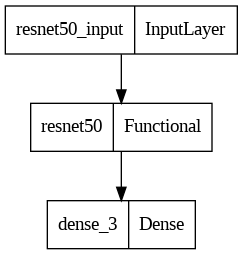

In [ ]:
plot_model(resnet50)

## Training

In [ ]:

# Save model
path_checkpoint_resnet50 = "/content/gdrive/MyDrive/Checkpoint/ResNet/checkpoint/sample"
directory_checkpoint = os.path.dirname(path_checkpoint_resnet50)
resnet50_callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint_resnet50,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model
epochs = 10  # Number of training epochs
Res_history = resnet50.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[resnet50_callback])

Epoch 1/10
361/361 [==============================] - ETA: 0s - loss: 4.8967 - accuracy: 0.3704
Epoch 1: saving model to /content/gdrive/MyDrive/Checkpoint/ResNet/checkpoint/sample
361/361 [==============================] - 368s 885ms/step - loss: 4.8967 - accuracy: 0.3704 - val_loss: 9.7880 - val_accuracy: 0.0228
Epoch 2/10
361/361 [==============================] - ETA: 0s - loss: 1.4284 - accuracy: 0.6704
Epoch 2: saving model to /content/gdrive/MyDrive/Checkpoint/ResNet/checkpoint/sample
361/361 [==============================] - 305s 846ms/step - loss: 1.4284 - accuracy: 0.6704 - val_loss: 3.4516 - val_accuracy: 0.2905
Epoch 3/10
361/361 [==============================] - ETA: 0s - loss: 0.9282 - accuracy: 0.7684
Epoch 3: saving model to /content/gdrive/MyDrive/Checkpoint/ResNet/checkpoint/sample
361/361 [==============================] - 300s 831ms/step - loss: 0.9282 - accuracy: 0.7684 - val_loss: 1.2033 - val_accuracy: 0.7168
Epoch 4/10
361/361 [==============================] 

## Load weights

In [ ]:
resnet50.load_weights('/content/gdrive/MyDrive/Checkpoint/ResNet/checkpoint/sample')

## Plot

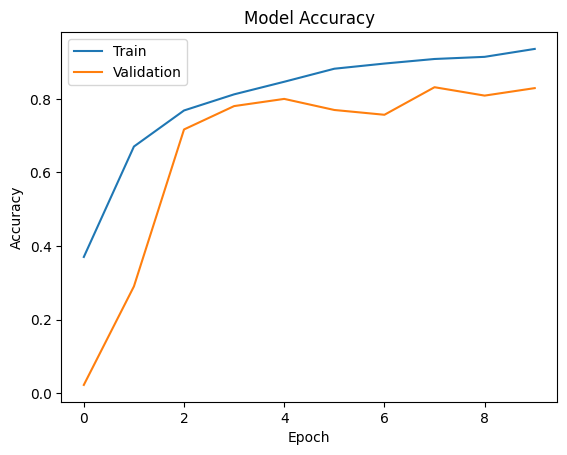

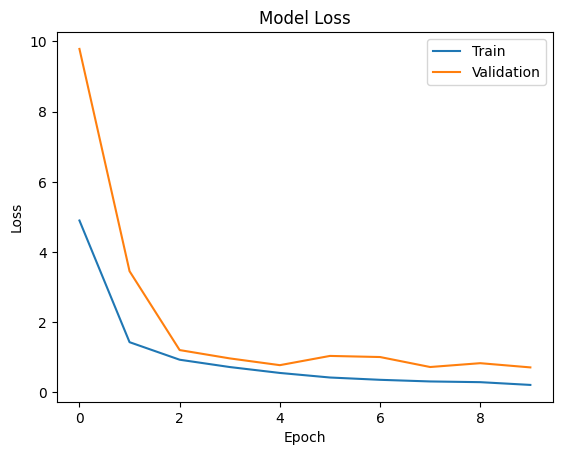

In [ ]:
plt.plot(Res_history.history['accuracy'])
plt.plot(Res_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(Res_history.history['loss'])
plt.plot(Res_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Test

In [ ]:
test_loss, test_accuracy = resnet50.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

116/116 [==============================] - 79s 685ms/step - loss: 0.8366 - accuracy: 0.8262
Test Loss: 0.8365715146064758
Test Accuracy: 0.8262392282485962


In [ ]:
# Make predictions on the test dataset using the trained model
output, labels = test_model1(resnet50)
predicted_labels = np.argmax(output, axis=1)

## confusion_matrix

[[68  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  6]]


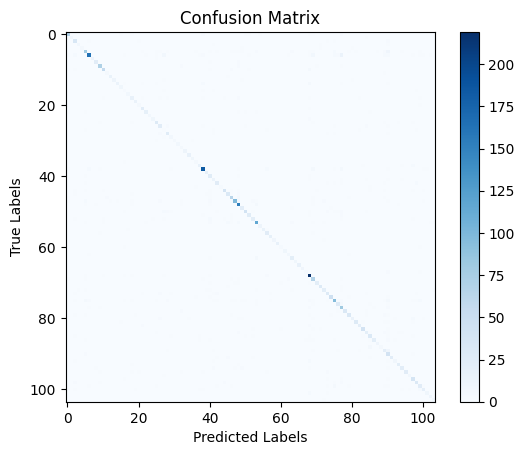

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(labels, predicted_labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Most Confusing Classes

In [ ]:
misclassification_count = np.sum(cm, axis=1) - np.diag(cm)

# Find the indices of the most confusing classes (classes with the highest misclassification counts)
most_confusing_classes = np.argsort(misclassification_count)[::-1]

# Print the 5 most confusing classes and their misclassification counts
for i in range(5):
    class_idx = most_confusing_classes[i]
    print('Class:',Classes_label[class_idx])
    print('Misclassification count:', misclassification_count[class_idx])
    print('---')

Class: morning glory
Misclassification count: 37
---
Class: moon orchid
Misclassification count: 36
---
Class: siam tulip
Misclassification count: 34
---
Class: windflower
Misclassification count: 21
---
Class: blanket flower
Misclassification count: 18
---


## F-score

In [ ]:
# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print precision, recall, and F1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.8442602249273786
Recall: 0.8254310344827587
F1 Score: 0.8281468071263652


### F score for each

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(labels, predicted_labels ,target_names=Classes_label)

# Print the classification report
print(report)

                           precision    recall  f1-score   support

            pink primrose       0.89      0.86      0.88        79
hard-leaved pocket orchid       1.00      0.86      0.92         7
         canterbury bells       0.69      0.85      0.76        40
                sweet pea       0.86      0.67      0.75         9
            wild geranium       1.00      0.57      0.73         7
               tiger lily       0.78      0.68      0.73       114
              moon orchid       0.95      0.75      0.84       216
         bird of paradise       1.00      0.92      0.96        13
                monkshood       0.92      0.89      0.91        27
            globe thistle       0.92      0.92      0.92        77
               snapdragon       0.92      0.85      0.88        66
              colt's foot       0.71      0.83      0.77         6
              king protea       0.94      0.94      0.94        16
            spear thistle       1.00      0.79      0.88     

### the class with best f score

In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for each class
f1_scores = f1_score(labels, predicted_labels, average=None)

# Find the class with the best F1 score
best_class = np.argmax(f1_scores)

# Print the class and its corresponding F1 score
print('Best class:', Classes_label[best_class])
print('F1 score:', f1_scores[best_class])
# Print the classification report

Best class: red ginger
F1 score: 1.0


# Ensemble

## Build model

In [ ]:
models = [model ,vgg19, resnet50]
model_input = Input(shape=(256, 256, 3))
model_outputs = [model(model_input) for model in models]
ensemble_outputs = Average()(model_outputs)
ensemble_model = Model(inputs = model_input, outputs = ensemble_outputs)

# Compile the model
ensemble_model.compile(optimizer=Adam(learning_rate=1e-3, epsilon=0.1), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


## load weights

In [ ]:
ensemble_model.load_weights('/content/gdrive/MyDrive/Checkpoint/Ensemble/checkpoint2/sample')

## Train

In [ ]:
# Save model
path_checkpoint_ensemble = "/content/gdrive/MyDrive/Checkpoint/Ensemble/checkpoint2/sample"
directory_checkpoint = os.path.dirname(path_checkpoint_ensemble)
ensemble_callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint_ensemble,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model
epochs = 10  # Number of training epochs
Ensemble_history = ensemble_model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[ensemble_callback])

Epoch 1/10
361/361 [==============================] - ETA: 0s - loss: 1.3068 - accuracy: 0.6065
Epoch 1: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble/checkpoint2/sample
361/361 [==============================] - 818s 1s/step - loss: 1.3068 - accuracy: 0.6065 - val_loss: 1.4518 - val_accuracy: 0.5964
Epoch 2/10
361/361 [==============================] - ETA: 0s - loss: 1.2390 - accuracy: 0.6400
Epoch 2: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble/checkpoint2/sample
361/361 [==============================] - 483s 1s/step - loss: 1.2390 - accuracy: 0.6400 - val_loss: 1.5255 - val_accuracy: 0.5891
Epoch 3/10
361/361 [==============================] - ETA: 0s - loss: 1.1995 - accuracy: 0.6421
Epoch 3: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble/checkpoint2/sample
361/361 [==============================] - 488s 1s/step - loss: 1.1995 - accuracy: 0.6421 - val_loss: 1.4219 - val_accuracy: 0.5940
Epoch 4/10
361/361 [==============================] 

## plot

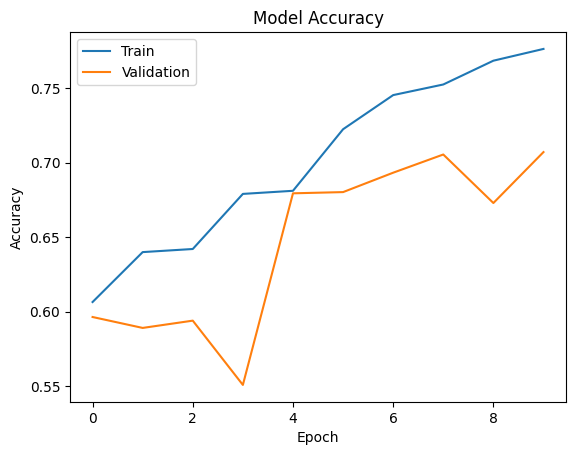

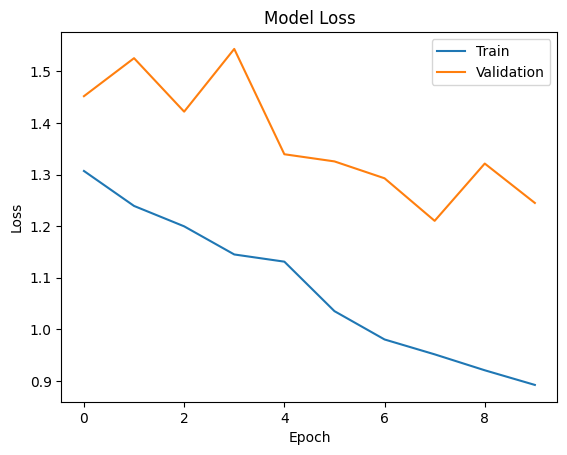

In [ ]:
plt.plot(Ensemble_history.history['accuracy'])
plt.plot(Ensemble_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(Ensemble_history.history['loss'])
plt.plot(Ensemble_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Test

In [ ]:
test_loss, test_accuracy = ensemble_model.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

116/116 [==============================] - 80s 691ms/step - loss: 1.3340 - accuracy: 0.6980
Test Loss: 1.3340394496917725
Test Accuracy: 0.6980064511299133


In [ ]:
# Make predictions on the test dataset using the trained model
output, labels = test_model1(ensemble_model)
predicted_labels = np.argmax(output, axis=1)

## confusion_matrix

[[59  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  5]]


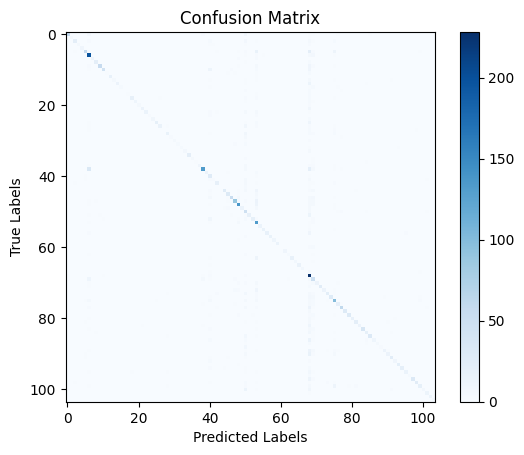

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(labels, predicted_labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Most Confusing Classes

In [ ]:
misclassification_count = np.sum(cm, axis=1) - np.diag(cm)

# Find the indices of the most confusing classes (classes with the highest misclassification counts)
most_confusing_classes = np.argsort(misclassification_count)[::-1]

# Print the 5 most confusing classes and their misclassification counts
for i in range(5):
    class_idx = most_confusing_classes[i]
    print('Class:',Classes_label[class_idx])
    print('Misclassification count:', misclassification_count[class_idx])
    print('---')

## F-score

In [ ]:
# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print precision, recall, and F1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.8603154556627929
Recall: 0.8515625
F1 Score: 0.8510308392860809


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### F score for each

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(labels, predicted_labels ,target_names=Classes_label)

# Print the classification report
print(report)

                           precision    recall  f1-score   support

            pink primrose       0.94      0.91      0.92        79
hard-leaved pocket orchid       1.00      0.71      0.83         7
         canterbury bells       0.88      0.72      0.79        40
                sweet pea       1.00      0.67      0.80         9
            wild geranium       1.00      0.86      0.92         7
               tiger lily       0.69      0.82      0.75       114
              moon orchid       0.87      0.86      0.86       216
         bird of paradise       1.00      0.85      0.92        13
                monkshood       0.89      0.93      0.91        27
            globe thistle       0.94      0.87      0.91        77
               snapdragon       0.89      0.95      0.92        66
              colt's foot       0.67      0.33      0.44         6
              king protea       1.00      1.00      1.00        16
            spear thistle       1.00      0.93      0.96     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




### the class with best f score

In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for each class
f1_scores = f1_score(labels, predicted_labels, average=None)

# Find the class with the best F1 score
best_class = np.argmax(f1_scores)

# Print the class and its corresponding F1 score
print('Best class:', Classes_label[best_class])
print('F1 score:', f1_scores[best_class])
# Print the classification report

Best class: king protea
F1 score: 1.0


# Ensemble with VGG and ResNet only

# Build model

In [ ]:
models2 = [vgg19, resnet50]
model_input2 = Input(shape=(256, 256, 3))
model_outputs2 = [model(model_input2) for model in models2]
ensemble_outputs2 = Average()(model_outputs2)
ensemble_model2 = Model(inputs = model_input2, outputs = ensemble_outputs2)

# Compile the model
ensemble_model2.compile(optimizer=Adam(learning_rate=1e-3, epsilon=0.1), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Load weights

In [ ]:
ensemble_model2.load_weights('/content/gdrive/MyDrive/Checkpoint/Ensemble2/checkpoint/sample')

# Train

In [ ]:
# Save model
path_checkpoint_ensemble2 = "/content/gdrive/MyDrive/Checkpoint/Ensemble2/checkpoint/sample"
directory_checkpoint = os.path.dirname(path_checkpoint_ensemble2)
ensemble2_callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint_ensemble2,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model
epochs = 10  # Number of training epochs
Ensemble_history2 = ensemble_model2.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=[ensemble2_callback])

Epoch 1/10
361/361 [==============================] - ETA: 0s - loss: 0.1435 - accuracy: 0.9714
Epoch 1: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble2/checkpoint/sample
361/361 [==============================] - 519s 1s/step - loss: 0.1435 - accuracy: 0.9714 - val_loss: 0.5942 - val_accuracy: 0.8584
Epoch 2/10
361/361 [==============================] - ETA: 0s - loss: 0.1752 - accuracy: 0.9642
Epoch 2: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble2/checkpoint/sample
361/361 [==============================] - 435s 1s/step - loss: 0.1752 - accuracy: 0.9642 - val_loss: 0.5081 - val_accuracy: 0.8723
Epoch 3/10
361/361 [==============================] - ETA: 0s - loss: 0.1981 - accuracy: 0.9616
Epoch 3: saving model to /content/gdrive/MyDrive/Checkpoint/Ensemble2/checkpoint/sample
361/361 [==============================] - 463s 1s/step - loss: 0.1981 - accuracy: 0.9616 - val_loss: 0.5882 - val_accuracy: 0.8568
Epoch 4/10
361/361 [==============================] 

# Plot

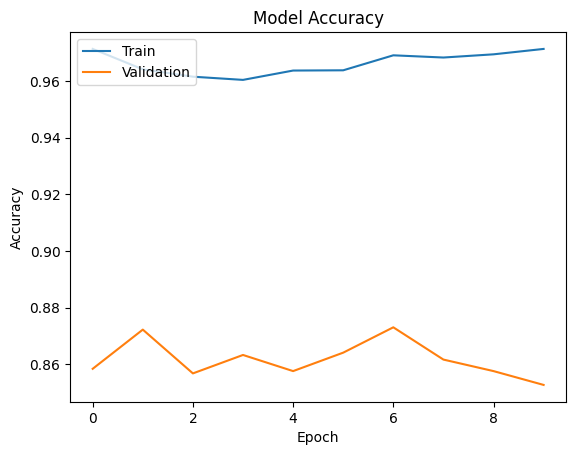

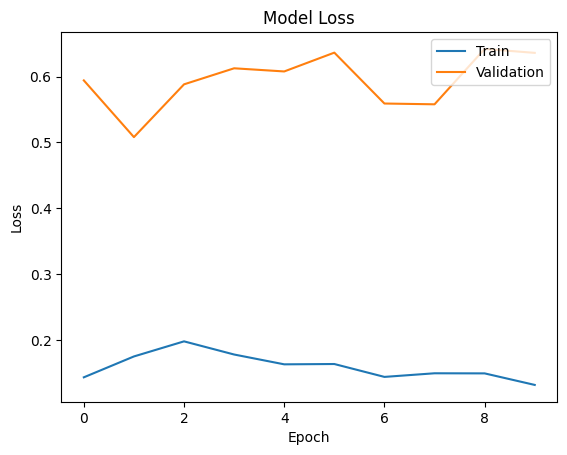

In [ ]:
plt.plot(Ensemble_history2.history['accuracy'])
plt.plot(Ensemble_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(Ensemble_history2.history['loss'])
plt.plot(Ensemble_history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Test

In [ ]:
test_loss, test_accuracy = ensemble_model2.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

116/116 [==============================] - 93s 802ms/step - loss: 0.7388 - accuracy: 0.8478
Test Loss: 0.7387925386428833
Test Accuracy: 0.8477909564971924


In [ ]:
# Make predictions on the test dataset using the trained model
output, labels = test_model1(ensemble_model2)
predicted_labels = np.argmax(output, axis=1)

[[73  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  7]]


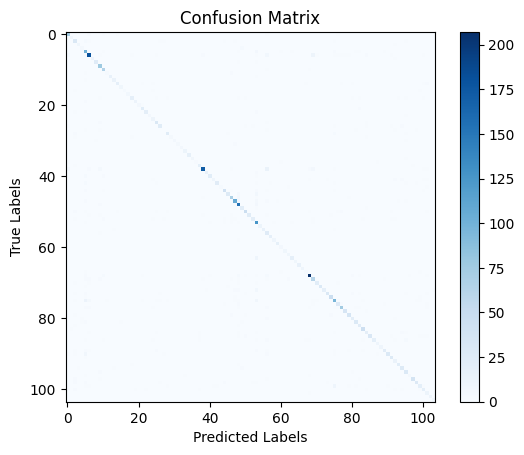

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(labels, predicted_labels)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Most Confusing Classes

In [ ]:
misclassification_count = np.sum(cm, axis=1) - np.diag(cm)

# Find the indices of the most confusing classes (classes with the highest misclassification counts)
most_confusing_classes = np.argsort(misclassification_count)[::-1]

# Print the 5 most confusing classes and their misclassification counts
for i in range(5):
    class_idx = most_confusing_classes[i]
    print('Class:',Classes_label[class_idx])
    print('Misclassification count:', misclassification_count[class_idx])
    print('---')

Class: morning glory
Misclassification count: 37
---
Class: moon orchid
Misclassification count: 36
---
Class: siam tulip
Misclassification count: 34
---
Class: windflower
Misclassification count: 21
---
Class: blanket flower
Misclassification count: 18
---


# F-Score

In [ ]:
# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print precision, recall, and F1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.8635002128357637
Recall: 0.8434806034482759
F1 Score: 0.8448818005086373


# F-Score for each

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(labels, predicted_labels ,target_names=Classes_label)

# Print the classification report
print(report)

                           precision    recall  f1-score   support

            pink primrose       0.87      0.92      0.90        79
hard-leaved pocket orchid       0.88      1.00      0.93         7
         canterbury bells       0.58      0.75      0.65        40
                sweet pea       0.89      0.89      0.89         9
            wild geranium       0.67      0.57      0.62         7
               tiger lily       0.62      0.88      0.72       114
              moon orchid       0.91      0.83      0.87       216
         bird of paradise       1.00      0.92      0.96        13
                monkshood       0.96      0.93      0.94        27
            globe thistle       0.81      1.00      0.90        77
               snapdragon       0.85      0.97      0.91        66
              colt's foot       0.75      0.50      0.60         6
              king protea       1.00      0.94      0.97        16
            spear thistle       0.87      0.93      0.90     

### the class with best f score

In [ ]:
from sklearn.metrics import f1_score


# Compute the F1 score for each class
f1_scores = f1_score(labels, predicted_labels, average=None)

# Find the class with the best F1 score
best_class = np.argmax(f1_scores)

# Print the class and its corresponding F1 score
print('Best class:', Classes_label[best_class])
print('F1 score:', f1_scores[best_class])
# Print the classification report

Best class: peruvian lily
F1 score: 1.0
